In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

name 'fort_exp' is not defined
ivars: [u'Iz']
no loading observed
ivar: -0.1800	cloading: 0.000	rloading: 0.064		cretention: nan +- 0.018	rretention: 0.875 +- 0.049
ivar: -0.1675	cloading: 0.004	rloading: 0.048		cretention: 0.500 +- 0.034	rretention: 0.792 +- 0.070
ivar: -0.1550	cloading: 0.002	rloading: 0.038		cretention: 1.000 +- 0.043	rretention: 0.842 +- 0.070
ivar: -0.1425	cloading: 0.002	rloading: 0.054		cretention: 1.000 +- 0.031	rretention: 0.815 +- 0.063
ivar: -0.1300	cloading: 0.006	rloading: 0.048		cretention: 1.000 +- 0.057	rretention: 0.708 +- 0.078
ivar: -0.1175	cloading: 0.012	rloading: 0.006		cretention: 0.833 +- nan	rretention: 0.667 +- 0.229
ivar: -0.1050	cloading: 0.012	rloading: 0.002		cretention: 1.000 +- 0.420	rretention: 1.000 +- 0.420
ivar: -0.0925	cloading: 0.014	rloading: 0.012		cretention: 1.000 +- nan	rretention: 0.833 +- 0.128
ivar: -0.0800	cloading: 0.004	rloading: 0.002		cretention: 1.000 +- 0.420	rretention: 1.000 +- 0.420


<IPython.core.display.Javascript object>


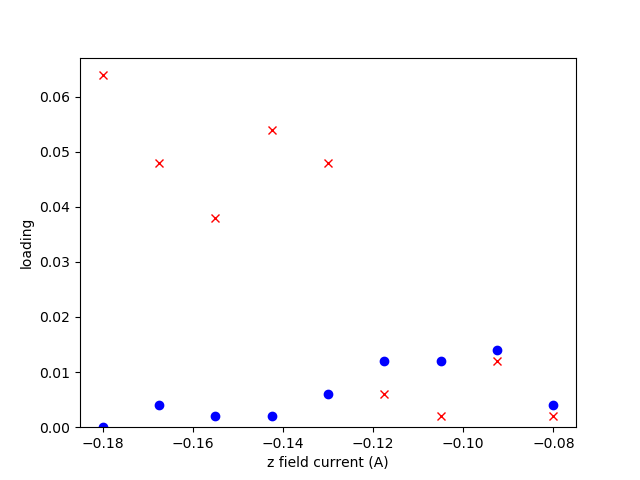

In [20]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])
cs_cuts = [[13],[2]]
rb_cuts = [[15],[2]]
q.set_thresholds(cs_cuts, roi=0)
q.set_thresholds(rb_cuts, roi=1)
retention = q.apply_thresholds()
cuts = q.get_thresholds()
roi_map = ['cs', 'rb']
entries = np.product(retention['retention'].shape[:-1])
tbl_str = "ivar: {0:.4f}\tcloading: {1:.3f}\trloading: {2:.3f}\t\tcretention: {3:.3f} +- {4:.3f}\trretention: {5:.3f} +- {6:.3f}"
for i in range(entries):
    print(tbl_str.format(
        retention['ivar'].reshape((entries,-1))[i][0],
        retention['loading'].reshape((entries,-1))[i][0], retention['loading'].reshape((entries,-1))[i][1],
        retention['retention'].reshape((entries,-1))[i][0], retention['error'].reshape((entries,-1))[i][0],
        retention['retention'].reshape((entries,-1))[i][1], retention['error'].reshape((entries,-1))[i][1]
    ))
q.save_experiment_data()
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.plot(retention['ivar'][e, :, 0], retention['loading'][e, :, 0], 'bo')
    ax.plot(retention['ivar'][e, :, 0], retention['loading'][e, :, 1], 'rx')
ax.set_ylim(0, 1.05*np.max(retention['loading']))
ax.set_xlabel(xlab)
ax.set_ylabel('loading')

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'loading_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


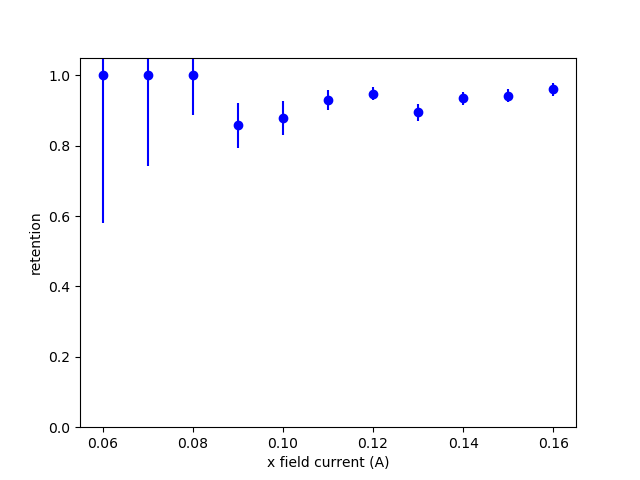

Text(0,0.5,u'retention')

In [166]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'bo'
    )
ax.set_ylim(0, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')